<a href="https://colab.research.google.com/github/TaniaHurtado2024/Seminario_BigData/blob/main/cars_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cars price prediction

The objective of this jupyter notebook is to train a machine learning algorithm to predict a car's price, based on known characteristics. The training data was obtained by web scraping, using Selenium and Beautiful Soap from tucarro.com.co; This project has no commercial purposes its for merely academic endeavor.
_Updated: June 22th, 2024_

## Data understanding

### Import libraries

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Load data

In [102]:
cols = ['model','price','year','kms','color','fueltype']
data = pd.read_csv('usedCarsCol_cx30_Modificado.csv', sep=',', names=cols, header=0, encoding='latin-1')
print(data.shape)
data.head()


(426, 6)


,model,price,year,kms,color,fueltype
0,Mazda CX-30 2.0 Grand Touring At,89990000,2021,79000,Blanco,Gasolina
1,Mazda CX-30 2.5 Grand Touring Lx 4x4,98500000,2021,72000,Gris,Gasolina
2,Mazda CX-30 2.0 Grand Touring At,97000000,2021,69629,Plateado,Gasolina
3,Mazda CX-30 Grand Touring 2.5,94000000,2021,68500,Blanco,Gasolina
4,Mazda CX-30 2.5 Grand Touring Lx 4x2,100900000,2021,68000,Blanco,Gasolina


### Verify data types

In [103]:
data.dtypes

model       object
price        int64
year         int64
kms          int64
color       object
fueltype    object
dtype: object

### Count unique values for each variable

In [104]:
data.nunique()

model        69
price       174
year          5
kms         219
color         9
fueltype      2
dtype: int64

In [105]:
print(data['model'].unique().tolist())
print(data['price'].unique().tolist())
print(data['year'].unique().tolist())
print(data['kms'].unique().tolist())
print(data['color'].unique().tolist())
print(data['fueltype'].unique().tolist())

['Mazda CX-30 2.0 Grand Touring At', 'Mazda CX-30 2.5 Grand Touring Lx 4x4', 'Mazda CX-30 Grand Touring 2.5', 'Mazda CX-30 2.5 Grand Touring Lx 4x2', 'Mazda CX-30 2.0 Prime', 'Mazda CX-30 2.0 Touring Aut', 'Mazda CX-30 2.0 Touring At', 'Mazda Cx-30 Prime 2000cc Mt Aa', 'Mazda CX-30 2.0 Touring', 'Mazda CX-30 2.5 Grand Touring At', 'Mazda CX-30 Grand Touring 2.0', 'Mazda CX-30 Touring 2.0', 'Mazda CX-30 2.0 Prime At', 'Mazda CX-30 2.5 Grand Touring 4X2', 'Mazda CX-30 TOURING MT 2.0CC 4X2', 'Mazda CX-30 Touring', 'Mazda CX-30 2.0 Grand Touring', 'Mazda CX-30 GRAND TOURING', 'Mazda CX-30 2.0 Grand Touring Mt', 'Mazda CX-30 GRAND TOURING 4X2 2500CC AT AA', 'Mazda CX-30 2.5 GRAND TOURING LX (MANTENIMIENTO EN CONCESIONARIO)', 'Mazda CX-30 2.0 Grand Touring At Hibrido Ligero - Mhev', 'Mazda CX-30 TOURING 4X2 2000CC AT AA', 'Mazda CX-30 gran touring 2.5', 'Mazda CX-30 2.0 Grand Touring Lx At Hibrido Ligero - Mhev', 'Mazda CX-30 Grand Touring LX 2.5', 'Mazda CX-30 TOURING 2.0 AUT 5P', 'Mazda CX

### Data transformation

In [106]:
# Copy data and remove model variable
datacc = data
datacc = datacc.drop(['model'], axis=1)
datacc.shape

(426, 5)

#### Transform $price$ to numerical

In [107]:
datacc['price'] = datacc['price'].astype(str).str.replace(r'[$.]', '', regex=True).astype(int)

##### Transform $kms$ to numerical

In [108]:
datacc['kms'] = datacc['kms'].astype(str).str.replace(r'[.]', '',regex=True).astype(int)

In [109]:
datacc.replace({'kms': {'Publicado': 0}}, inplace=True)

In [110]:
datacc['kms'] = datacc['kms'].replace('[.]','',regex=True).astype(int)

##### Transform categorical variables to dummies: $year$ and $fuel type$

In [111]:
# Object to categorical
datacc['color'] = datacc['color'].astype('category')
datacc['fueltype'] = datacc['fueltype'].astype('category')
datacc.dtypes

price          int64
year           int64
kms            int64
color       category
fueltype    category
dtype: object

In [112]:
# Convert to dummies
# Convert category to codes
datacc['color']  = pd.Categorical(datacc['color']).codes
datacc['fueltype']  = pd.Categorical(datacc['fueltype']).codes
datacc.head()

,price,year,kms,color,fueltype
0,89990000,2021,79000,1,0
1,98500000,2021,72000,4,0
2,97000000,2021,69629,7,0
3,94000000,2021,68500,1,0
4,100900000,2021,68000,1,0


## Data Exploration

In [113]:
# Descriptive statistics
datacc.describe()[['price','year','kms']]

,price,year,kms
count,4.260000e+02,426.000000,426.000000
mean,1.083324e+08,2022.377934,29578.363850
std,1.343074e+07,1.099896,16648.809904
min,6.900000e+07,2021.000000,0.000000
25%,9.760000e+07,2022.000000,16550.000000
50%,1.078000e+08,2022.000000,28752.000000
75%,1.169000e+08,2023.000000,42000.000000
max,1.539500e+08,2025.000000,79000.000000


#### Histograms

Text(0.5, 1.0, '$kms$')

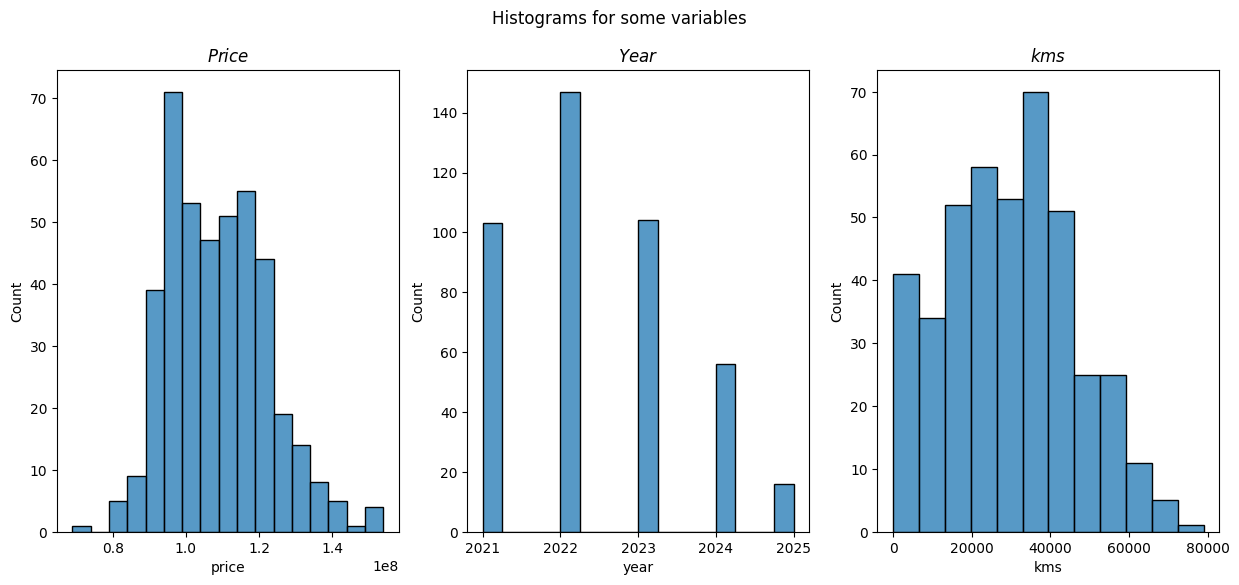

In [91]:
# Histograms
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))
fig.suptitle('Histograms for some variables')
sns.histplot(datacc['price'], ax=ax1)
ax1.set_title('$Price$')
sns.histplot(datacc['year'], ax=ax2)
ax2.set_title('$Year$')
sns.histplot(datacc['kms'], ax=ax3)
ax3.set_title('$kms$')

#### Boxplots

<Axes: >

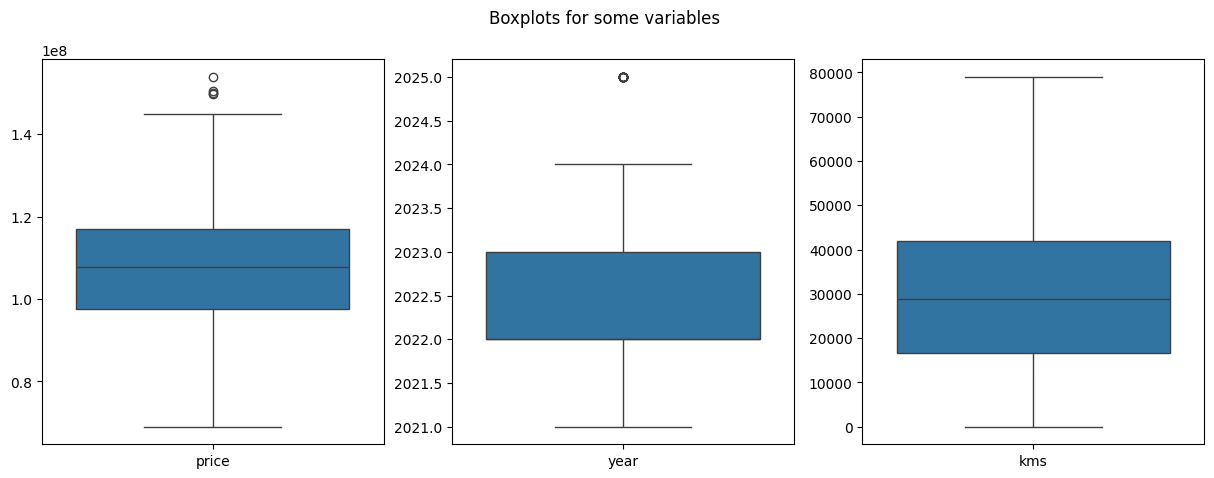

In [92]:
### Boxplot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Boxplots for some variables')
sns.boxplot(data=datacc[['price']], ax=ax1)
sns.boxplot(data=datacc[['year']], ax=ax2)
sns.boxplot(data=datacc[['kms']], ax=ax3)

#### Ouliers treatment
_https://www.statology.org/remove-outliers-python/_  
_https://towardsdatascience.com/a-complete-guide-for-detecting-and-dealing-with-outliers-bad26b1e92b6_  
_https://www.scribbr.com/statistics/outliers/_  
_https://www.statology.org/remove-outliers/_  

<Axes: >

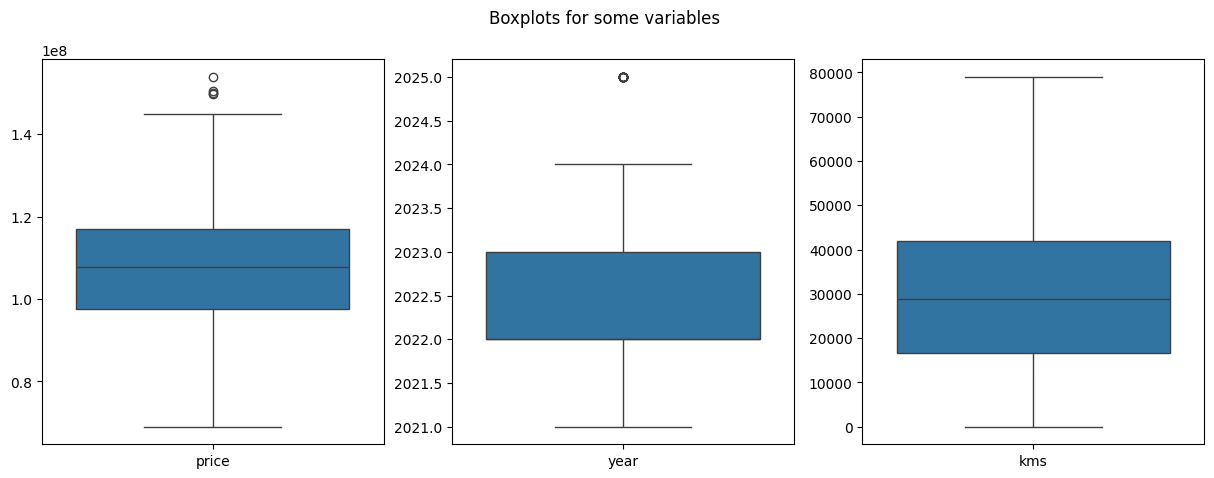

In [93]:
# Z score to eliminate outliers of 'year' and 'kms'
from scipy import stats

#find absolute value of z-score for each observation of 'kms'
z2 = np.abs(stats.zscore(datacc['kms']))

#only keep rows in dataframe with all z-scores less than absolute value of 3
toremove = datacc.kms[(z2>3)].index
datacc = datacc.drop(toremove)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Boxplots for some variables')
sns.boxplot(data=datacc[['price']], ax=ax1)
sns.boxplot(data=datacc[['year']], ax=ax2)
sns.boxplot(data=datacc[['kms']], ax=ax3)

Text(0.5, 1.0, '$kms$')

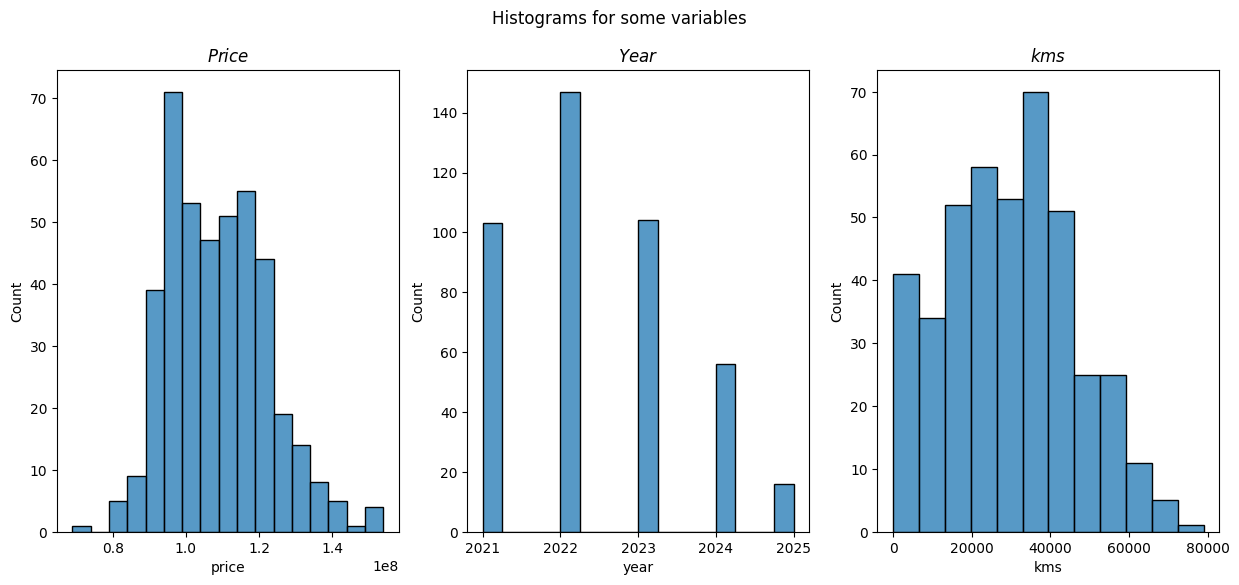

In [94]:
# Histograms
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))
fig.suptitle('Histograms for some variables')
sns.histplot(datacc['price'], ax=ax1)
ax1.set_title('$Price$')
sns.histplot(datacc['year'], ax=ax2)
ax2.set_title('$Year$')
sns.histplot(datacc['kms'], ax=ax3)
ax3.set_title('$kms$')

### EDA (Exploratory Data Analysis)

#### Correlations

In [100]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.2, annot=False, cbar_kws={"shrink": .95}
                )
    plt.show();

correlation_heatmap(X[['year', 'kms']])

TypeError: list indices must be integers or slices, not list

In [ ]:
g = sns.PairGrid(X[['year', 'kms']])
g.map(sns.scatterplot)

## Modeling: machine learning

### Libraries

In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE, r2_score
from sklearn.metrics import mean_absolute_error as MAE
import pickle

### Data partitioning


In [115]:
X = datacc.copy()
X = X.drop(['price'], axis=1)
print(X.shape)

Y = pd.DataFrame()
Y = datacc['price']
print(Y.shape)

(426, 4)
(426,)


In [116]:
# Data set normalization and partitioning
sc = StandardScaler()
Xsc = sc.fit(X)
Xt = Xsc.transform(X)
Xt.shape

(426, 4)

In [117]:
X_train, X_test, y_train, y_test = split(Xt,Y,
                                         test_size=0.20,
                                         random_state=42)

### Multivariate lineal regression

In [118]:
# Define model and prediction
ols = LinearRegression()
model1 = ols.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [119]:
# accuracy check
rmse = MSE(y_test, y_pred1, squared=False)
mae = MAE(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 10592774.06
MAE: 7719371.70
R2: 0.47


### Light GBM
https://www.analyticsvidhya.com/blog/2021/08/complete-guide-on-how-to-use-lightgbm-in-python/   
https://www.datatechnotes.com/2022/03/lightgbm-regression-example-in-python.html  

In [219]:
!pip install lightgbm

In [220]:
import lightgbm as lgb

In [221]:
# Hyperparameters
params = {
    'task': 'train',
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learning_rate': 0.0001,
    'metric': {'l2','l1'},
    'header' : 'true',
    'verbose': 0
}

# laoding data
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# fitting the model
model2 = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval)
# Pred
y_pred2 = model2.predict(X_test)

In [222]:
# accuracy check
rmse = MSE(y_test, y_pred2, squared=False)
mae = MAE(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 14419994.80
MAE: 11773404.79
R2: 0.01


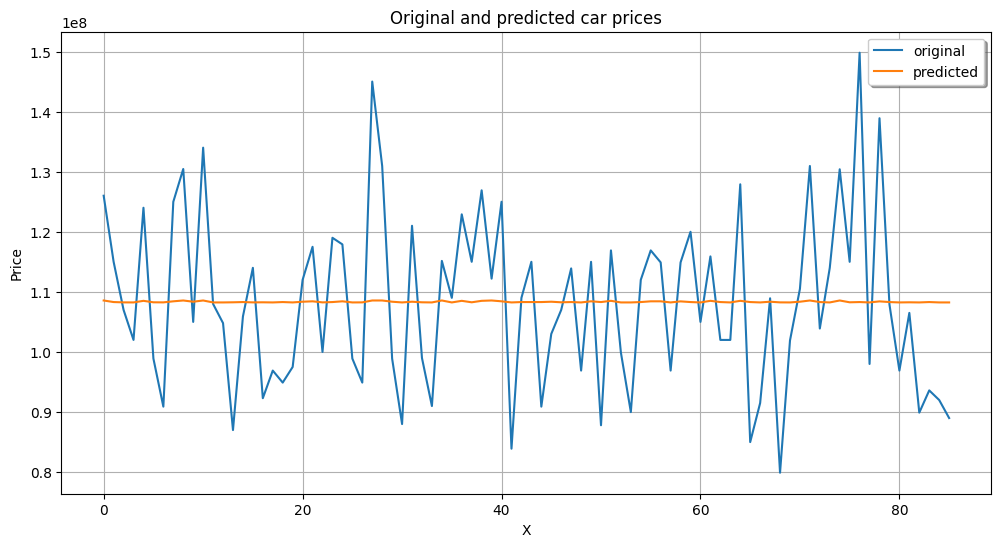

In [223]:
# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred2, label="predicted")
plt.title("Original and predicted car prices")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

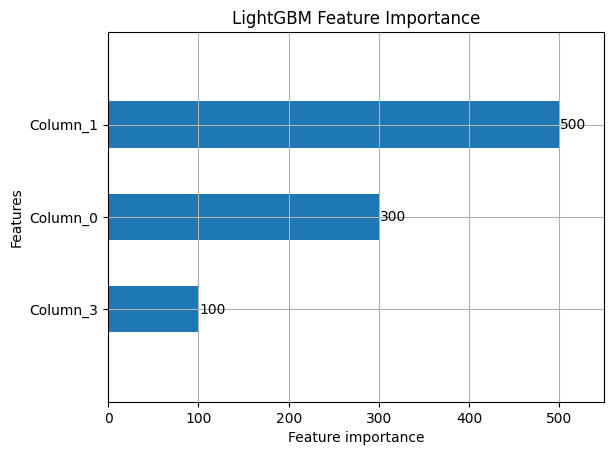

In [224]:
# plotting feature importance
ax = lgb.plot_importance(model2, height=.5, title="LightGBM Feature Importance")


<Axes: >

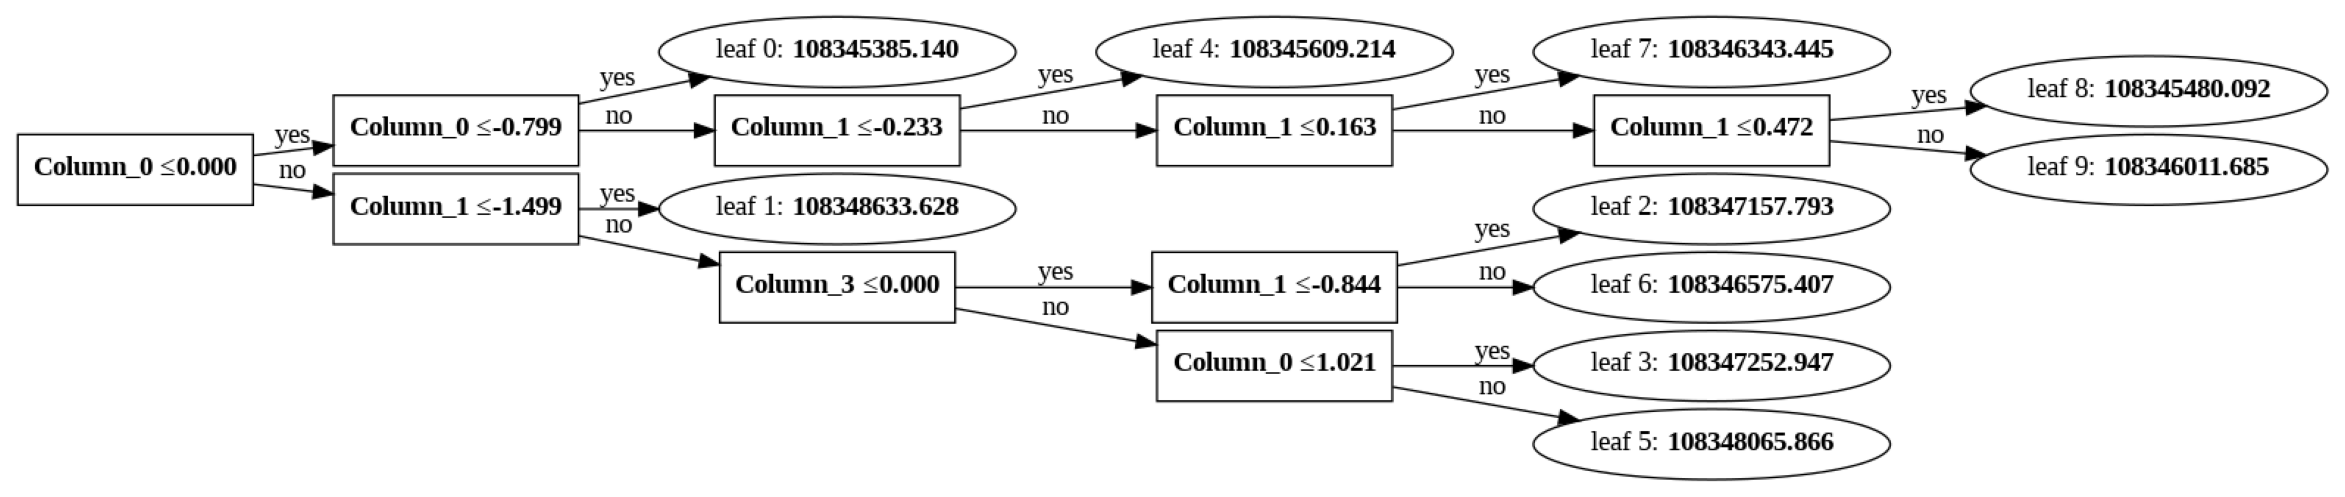

In [225]:
lgb.plot_tree(model2,figsize=(30,40))

### Random Forest Regressor

In [215]:
from sklearn.ensemble import RandomForestRegressor

In [216]:
model3 = RandomForestRegressor(n_estimators=100,
                              max_depth=5,
                              min_samples_split=2,
                              min_samples_leaf=1,
                              max_features='auto')
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [217]:
# accuracy check
rmse = MSE(y_test, y_pred3, squared=False)
mae = MAE(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 10163364.98
MAE: 7460034.75
R2: 0.51


**Save the model**

In [218]:
with open('model3.pkl', 'wb') as f:
  pickle.dump(model3, f)

### Xgboost regressor
https://www.datatechnotes.com/2019/06/regression-example-with-xgbregressor-in.html

In [207]:
from sklearn.model_selection import cross_val_score, KFold
import xgboost as xgb
from sklearn.metrics import classification_report

In [208]:
#Define model
model4 = xgb.XGBRegressor(objective ='reg:squarederror',
                          booster='gbtree',
                          colsample_bytree = 0.1,
                          importance_type='gain',
                          learning_rate = 0.001,
                          max_depth = 1,
                          alpha = 0.5,
                          n_estimators = 100,
                          seed=123)

In [209]:
#Training
model4.fit(X_train, y_train)#,
#         eval_set=[(X_train, y_train), (X_test, y_test)], \
#         eval_metric='mlogloss', verbose=False)

XGBRegressor(alpha=0.5, base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.1, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type='gain',
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [210]:
#K-fold cross validation
scores = cross_val_score(model4, X_train, y_train, cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: -0.00


In [211]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(model4, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.02


In [212]:
# Pred
y_pred4 = model4.predict(X_test)

In [213]:
# accuracy check
rmse = MSE(y_test, y_pred4, squared=False)
mae = MAE(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 14199961.85
MAE: 11561427.35
R2: 0.04


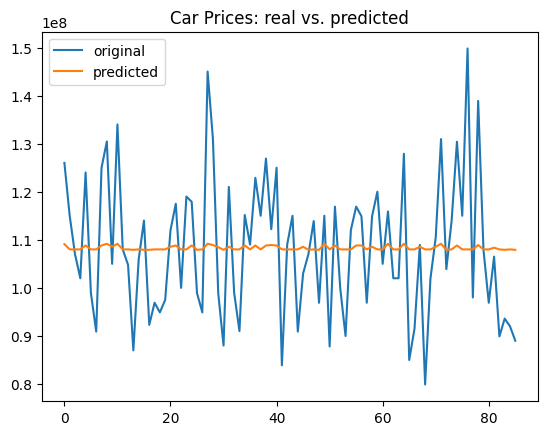

In [214]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred4, label="predicted")
plt.title("Car Prices: real vs. predicted")
plt.legend()
plt.show()